In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
import seaborn as sns

# Data exploration

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
df = pd.read_json('../raw_data/df_with_age_gender.json')
df.head()

,full_transcript,artist,show_name,year,source,artist_birthday,artist_gender,age_then
0,[rock music playing]\n\n[indistinct chatter]\n...,Adam Devine,Best Time Of Our Lives,2019.0,Scraps from the Loft,1983.0,2,36.0
1,"strong language. CHEERING Yes, yes, yes! How...",Adam Hess,Live from the BBC,2016.0,BBC,1990.0,2,26.0
2,"Ladies and gentlemen, please welcome your hos...",Adam Hills,Live at the Apollo Series 9 Episode 4,2013.0,BBC,1970.0,2,43.0
3,some strong language and adult humour Ladies...,Adam Hills,Live at the Apollo Series 12 Episode 4,2016.0,BBC,1970.0,2,46.0
4,"Adam Hills? CHEERING Hello, Apollo. I am going...",Adam Hills,Live at the Apollo Series 5 Episode 5,2009.0,BBC,1970.0,2,39.0


## distribution

### Gender

<AxesSubplot:xlabel='artist_gender', ylabel='Count'>

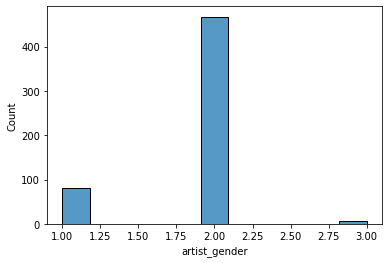

In [7]:
sns.histplot(data=df, x="artist_gender")

In [38]:
df.groupby(['artist_gender']).count()

,full_transcript,artist,show_name,year,source,artist_birthday,age_then
artist_gender,,,,,,,
1,82,82,82,82,82,82,82
2,467,467,467,464,467,466,463
3,6,6,6,6,6,6,6


Graph 1: Gender of unique comedians:

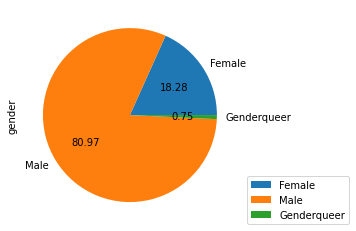

In [49]:
df.groupby(['artist_gender']).nunique()['artist'].rename(
    index={1: 'Female', 2: 'Male', 3: 'Genderqueer'}).plot(
    kind='pie', label ='gender', autopct='%.2f')
plt.legend(loc=(1.04,0))

Graph 2: Gender of all comedian-show

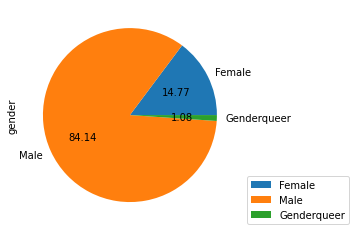

In [44]:
df.groupby(['artist_gender']).size().rename(
    index={1: 'Female', 2: 'Male', 3: 'Genderqueer'}).plot(
    kind='pie', label ='gender', autopct='%.2f')
plt.legend(loc=(1.04,0))

### Year of performance

In [55]:
df.groupby(['year']).size()

year
1963.0     1
1965.0     2
1971.0     1
1972.0     1
1975.0     1
1976.0     1
1977.0     1
1978.0     1
1979.0     1
1982.0     1
1983.0     3
1984.0     1
1986.0     1
1987.0     1
1988.0     1
1990.0     1
1991.0     2
1992.0     1
1993.0     4
1994.0     2
1996.0     4
1997.0     1
1998.0     3
1999.0     6
2000.0     2
2001.0     2
2002.0     1
2003.0     2
2004.0     6
2005.0     2
2006.0     8
2007.0     8
2008.0     9
2009.0    21
2010.0    32
2011.0    33
2012.0    37
2013.0    34
2014.0    34
2015.0    45
2016.0    59
2017.0    55
2018.0    42
2019.0    38
2020.0    31
2021.0     9
dtype: int64

Graph 1: Number of shows per year

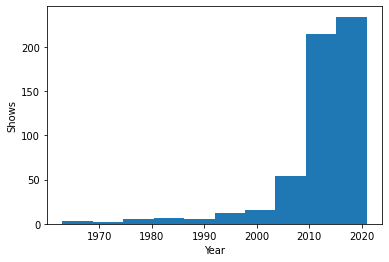

In [106]:
plt.hist(df['year'])
plt.xlabel('Year')
plt.ylabel('Shows');

Graph 2: Number of shows grouped by decades

In [74]:
decade_df = df.groupby((df.year//10)*10)['full_transcript'].count().reset_index()
decade_df

,year,full_transcript
0,1960.0,3
1,1970.0,7
2,1980.0,8
3,1990.0,24
4,2000.0,61
5,2010.0,409
6,2020.0,40


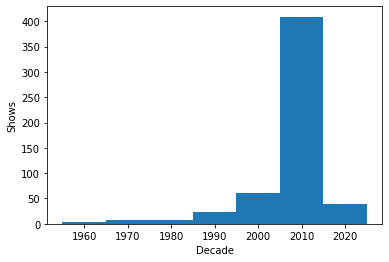

In [99]:
x = decade_df['year']
y = decade_df['full_transcript']

plt.bar(x, y, width=10)
plt.xlabel('Decade')
plt.ylabel('Shows');

### Age of comedians

In [105]:
df['age_then'].mean()

40.55535390199637

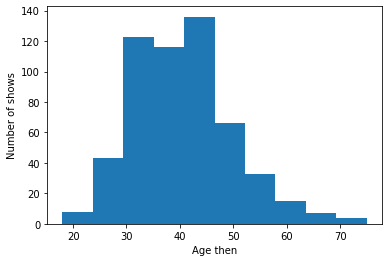

In [104]:
plt.hist(df['age_then'])
plt.xlabel('Age then')
plt.ylabel('Number of shows');

# Preprocessing of Text for Analysis Purposes

## Import filtered dataframe

In [ ]:
df = pd.read_json('../raw_data/df_with_age_gender.json')

In [ ]:
len(df)

## Cleaning Functions

In [ ]:
### Specific functions to standup/scraps from the loft
def remove_music(text):
    text = re.sub('♪.*?♪', '', text) # remove ♪ stuff that looks like this ♪
    return text

def remove_bracketed(text):
    text = re.sub('\[.*?\]', '', text) # remove [stuff that looks like this]
    text = re.sub('\(.*?\)', '', text) # remove (stuff that looks like this)
    return text

def remove_useless(text):
    text = re.sub('\n\w+\(\s\w+\)?\:\s', '', text) # remove Word: or Word word: with a newline before
    text = re.sub('subtitles? by \w+', '', text) # remove subtile(s) by xxxx
    return text

In [ ]:
# general functions for text pre-processing
def remove_punc(text, chars):
    txt = text
    for punc in chars:
        txt = txt.replace(punc, '')
    return txt

def remove_num(text):
    return ''.join(char for char in text if not char.isdigit())

def remove_stopw(text, word_list):
    word_tokens = word_tokenize(text)
    return ' '.join(w for w in word_tokens if not w in word_list)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split(' ') if len(lemmatizer.lemmatize(word))>2)

In [ ]:
def manual_lemmatizer(text):
    text = text.replace('got', 'get').replace(
        'gon', 'go').replace(
        'said', 'say').replace(
        'fucking', 'fuck').replace(
        'went', 'go').replace(
    'finding', 'find')
    return text

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

## Modifying & applying removal lists 

In [ ]:
clean_df = df.copy()

### Remove everything in Brackets, Music notes

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_bracketed)

In [ ]:
## TODO: Remove ♪ from specific comedians:
# [Bo Burnham]

In [ ]:
# clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_music)

### Lowercase, remove useless regex matches, numbers, stopwords and punctuation
Including specific scraps format

In [ ]:
stopwords.words('english')

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].str.lower()

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_useless)

In [ ]:
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', "that's", "i'm", "don't"]
# other possible removals 'netflix special', 'full transcript' 

In [ ]:
stopwords_plus = words_to_remove + stopwords.words('english')

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_num)

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(stopwords_plus,))

In [ ]:
punc_added = string.punctuation + '“”‘’…♪¶'

clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_punc, args=(punc_added,))

In [ ]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(lemmatize).apply(manual_lemmatizer)

### Remove numbers and stopwords + common comedy words

In [ ]:
clean_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
t = clean_df['full_transcript_clean'].astype(str)

vectorizer = CountVectorizer(min_df = 0.3, max_df = 0.8, ngram_range=(1,2))
X = vectorizer.fit_transform(t)
bow_df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
bow_df

In [ ]:
keys = bow_df.sum().index
values = bow_df.sum().values
bow_dict = dict(zip(keys, values))
print(bow_dict)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(clean_df['full_transcript_clean'])

data_vectorized = vectorizer.transform(clean_df['full_transcript_clean'])

lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

In [ ]:
token_df = clean_df['full_transcript_clean'].apply(tokenize).astype(str)
token_df

In [ ]:
pd.Series([y for x in token_df.values.flatten() for y in x.split()]).value_counts()

In [ ]:
# frequent_words = ['like']
# clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(frequent_words,))

In [ ]:
full_transcripts = ' '.join(clean_df['full_transcript_clean'])

In [ ]:
len(full_transcripts)

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
word_cloud = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate(full_transcripts)

In [ ]:
plot_cloud(word_cloud)

In [ ]:
word_cloud2 = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate_from_frequencies(bow_dict)
plot_cloud(word_cloud2)